# Zestaw 4. Kwadratury 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import roots_legendre

## 1. Kwadratury elementarne
<i>Napisz funkcję, która policzy prostą, zamkniętą kwadraturę Simpsona</i>

In [2]:
def simpson_quadrature(f, a, b):
    h = b - a
    middle = (a + b)/2
    return h*(f(a) + 4*f(middle) + f(b))/6

<i>a. Przetestuj jej działanie na jednomianach kolejnych stopni, nie większych niż 5 poprzez porównanie wyników z wartościami analitycznymi. Opisz wyniki. </i>

In [3]:
def test_simpson(n):
    def monomial(i):
        return lambda x: x**i
    
    for i in range(n+1):
        simpson = simpson_quadrature(monomial(i), 0, 1)
        actual = 1/(i+1)*monomial(i+1)(1)
        print(f"|x^{i}| expected: {actual:.5f}, got: {simpson:.5f}, err: {abs(actual-simpson):.5f}, exact? {np.isclose(actual-simpson, 0)}")

In [4]:
test_simpson(5)

|x^0| expected: 1.00000, got: 1.00000, err: 0.00000, exact? True
|x^1| expected: 0.50000, got: 0.50000, err: 0.00000, exact? True
|x^2| expected: 0.33333, got: 0.33333, err: 0.00000, exact? True
|x^3| expected: 0.25000, got: 0.25000, err: 0.00000, exact? True
|x^4| expected: 0.20000, got: 0.20833, err: 0.00833, exact? False
|x^5| expected: 0.16667, got: 0.18750, err: 0.02083, exact? False


Stopień dokładności kwadratury Simpsona wynosi 3, co oznacza, że daje ona dokładny wynik dla wielomianów stopnia 3 lub niższego. Ta własność została potwierdzana doświadczalnie. Wyniki dla jednomianów stopnia od 0 do 3 włącznie są dokładne, a dla wyższych stopni wynik kwadratury różni się od tego uzyskanego analitycznie.

<i>b. Przetestuj jej działanie na funkcji $f(x) = e^{−3x} sin(4x)$ na przedziale x ∈ [0, 5] poprzez wyliczenie jej wartości na całym przedziale, a następnie porównanie z sumą metody na dwóch podprzedziałach [0, 1] i [1, 5]. Czemu wyniki się różnią?</i>

In [5]:
f = lambda x: np.e**(-3*x)*np.sin(4*x)

print("        [0,5] ->", simpson_quadrature(f, 0, 5))
print("[0,1] + [1,5] ->", simpson_quadrature(f, 0, 1) + simpson_quadrature(f, 1, 5))

        [0,5] -> -0.0010027325181523326
[0,1] + [1,5] -> 0.10368557622593555


Wyniki różnią się, gdyż dobierając inne zestawy węzłów interpolacji, otrzymujemy inne interpolujące funkcje kwadratowe, które w różny sposób przybliżają zadaną funkcję. Różnica między funkcjami interpolującymi f w dwóch przypadkach jest dobrze widoczna na wykresie w punkcie c.

<i>c. Zaprezentuj na wykresie funkcję f oraz kwadratowy wielomian interpolujący ją w węzłach będących końcami przedziału i jego środkiem. Oblicz kwadraturę wyliczonego w ten sposób wielomianu i porównaj wyniki. W jaki sposób ten wielomian jest powiązany z metodą Simpsona?</i>

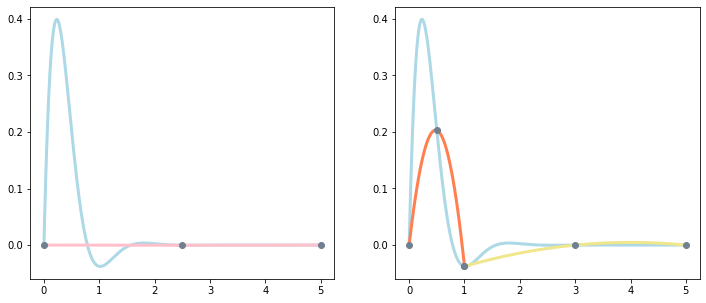

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

def plot_interpolation(ax, f, interval, color):
    x_axis = np.linspace(interval[0], interval[1], 500)
    ax.plot(x_axis, f(x_axis), color='lightblue', linewidth=3)
    
    points = [interval[0], (interval[0]+interval[1])/2, interval[1]]
    interp = interp1d(points, list(map(f, points)), kind='quadratic')
    ax.plot(x_axis, interp(x_axis), color=color, linewidth=3)
    ax.scatter(points, list(map(f, points)), color='slategrey', zorder=5)

plot_interpolation(ax[0], f, [0, 5], "pink")
plot_interpolation(ax[1], f, [0, 1], "coral")
plot_interpolation(ax[1], f, [1, 5], "khaki")

Metoda Simpsona tak naprawdę liczy całkę z funkcji interpolującej zadane odwzorowanie. Ponieważ w metodzie tej wybieramy 3 charakterystyczne punkty, to wielomian interpolujący jest funkcją kwadratową. Wyniki różnią się, gdyż interpolując na całym przedziale, nie otrzymaliśmy dokładnego przybliżenia funkcji. Wybrane punkty okazały się niemalże współliniowe, interpolacja nie uwzględnia wyraźnego peeku dla wartości w przedziale [0, 1]. Dzieląc dziedzinę funkcji na 2 części, byliśmy w stanie dokładniej oddać jej charakter. W szczególności, dobranie przedziałów nie jest przypadkowe. W przedziale [0, 1] funkcja zmienia się w wyraźnie inny sposób niż na przedziale [1, 5] i każdy z tych charakterów nadaje się całkiem nieźle do przybliżenia wielomianem niskiego stopnia.

## 2. Kwadratury adaptacyjne
<i>Zaimplementuj adaptacyjną kwadraturę Simpsona. Dla kilku różnych dokładności ε wykonaj poniższe polecenia.</i>

In [7]:
def adaptive_quadrature(f, a, b, epsilon):
    s_q = simpson_quadrature
    a_q = adaptive_quadrature
    mid = (a + b)/2
    diff = abs(s_q(f, a, b) - s_q(f, a, mid) - s_q(f, mid, b))
    if diff < 15*epsilon:
        return s_q(f, a, mid) + s_q(f, mid, b)
    return a_q(f, a, mid, epsilon/2) + a_q(f, mid, b, epsilon/2)

<i>a. Przetestuj ją na funkcji f z zadania 1.b i porównaj wyniki z elementarną metodą Simpsona</i>

In [8]:
adaptive_quadrature(f, 0, 5, 1e-10)

0.1599999465166611

Otrzymany wynik różni się od tego otrzymanego dla niezmodyfikowanej metody Simpsona. Jest on dokładniejszy. W metodzie Simpsona dla jednego przedziału otrzymaliśmy ok. -0.001, dla dwóch ok. 0.103. Dla procedury adaptacyjnej wynik to ok. 0.160. Wynik podany przez kalkulator WolframAlpha również równa się 0.160.

<i>b. Zaprezentuj na wykresie funkcję f oraz punkty podziału wyliczone przez metodę
adaptacyjną. Opisz wyniki.</i>

In [9]:
def adaptive_quadrature_points(f, a, b, epsilon, points):
    s_q = simpson_quadrature
    mid = (a + b)/2
    diff = abs(s_q(f, a, b) - s_q(f, a, mid) - s_q(f, mid, b))
    
    if diff < 15*epsilon:
        points.update([a, mid, b])
        return s_q(f, a, mid) + s_q(f, mid, b)
    
    return adaptive_quadrature_points(f, a, mid, epsilon/2, points) + adaptive_quadrature_points(f, mid, b, epsilon/2, points)

In [10]:
def plot_adaptive_points(f, a, b, epsilon, ax):
    points=set()
    adaptive_quadrature_points(f, a, b, epsilon, points)

    x_axis = np.linspace(a, b, 500)
    ax.plot(x_axis, f(x_axis), color='maroon', linewidth=3)
    points = np.array(list(points))
    ax.scatter(points, f(points), zorder=5, color="darkblue")
    ax.set_title(f'epsilon: {epsilon}')

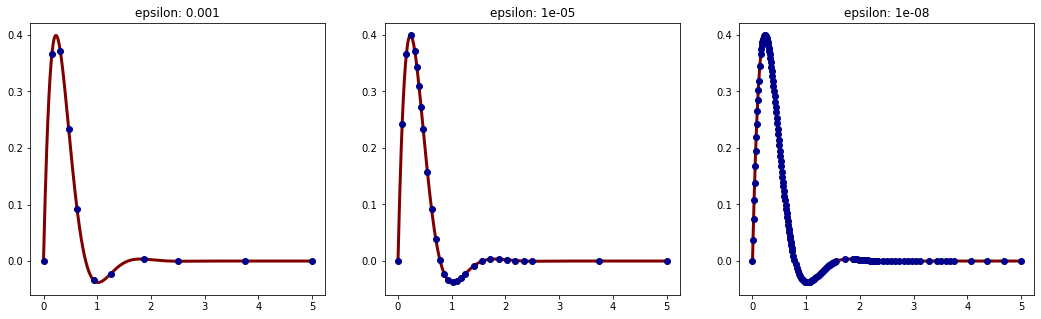

In [11]:
_, ax = plt.subplots(1, 3, figsize=(18, 5))
plot_adaptive_points(f, 0, 5, 1e-3, ax[0])
plot_adaptive_points(f, 0, 5, 1e-5, ax[1])
plot_adaptive_points(f, 0, 5, 1e-8, ax[2])

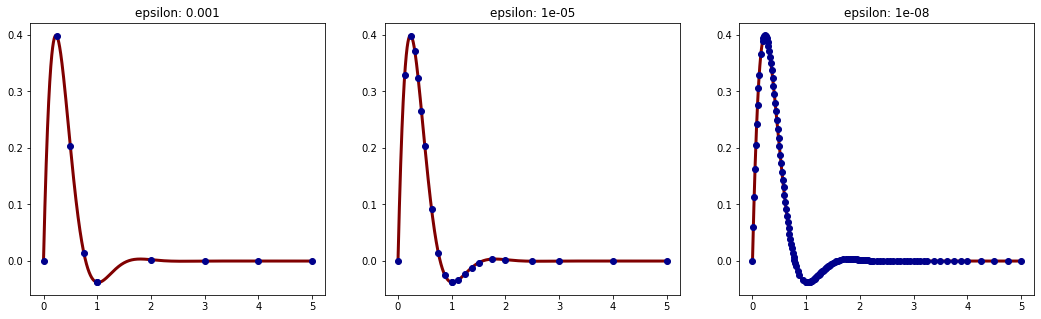

In [12]:
_, ax = plt.subplots(1, 3, figsize=(18, 5))
plot_adaptive_points(f, 0, 1, 1e-3, ax[0])
plot_adaptive_points(f, 1, 5, 1e-3, ax[0])
plot_adaptive_points(f, 0, 1, 1e-5, ax[1])
plot_adaptive_points(f, 1, 5, 1e-5, ax[1])
plot_adaptive_points(f, 0, 1, 1e-8, ax[2])
plot_adaptive_points(f, 1, 5, 1e-8, ax[2])

W ogólnym przypadku, im większą dokładność chcemy otrzymać, tym na większą liczbę przedziałów będziemy dzielić dziedzinę zadanej funkcji. Zagęszczenie punktów nie jest jednostajne. Punkty są bardziej zagęszczone w miejscach, w których funkcja zmienia się znacznie, w sposób nieprzypominający wielomianu stopnia max 3. 

Wykonałem testy w dwóch wersjach: rozpoczynając od całego przedziału oraz dzieląc przedział na [0, 1] oraz [1, 5] już na początku, aby nakierować funkcję na lepszy podział. Rozmieszczenie punktów różni się w obu przypadkach, ale nie w znaczącym stopniu.

## 3. Wielomiany ortogonalne
<i>Korzystając z modułu numpy.poly1d zaimplementuj wielomiany Legendre’a zdefiniowane w następujący sposób: </i><br>
>$$
P_0(x) = 1 \\
P_1(x) = x \\
P_{k+1}(x) = \frac{2k+1}{k+1}xP_k(x) − \frac{k}{k+1}P_{k−1}(x) 
$$

In [13]:
def legendre_poly(low, high):
    p1 = np.poly1d([1])
    p2 = np.poly1d([1,0])
    
    if low <= 0 <= high:
        yield p1
    if low <= 1 <= high:
        yield p2
                   
    for k in range(2, high+1):
        p2, p1 = (2*k-1)/k*np.poly1d([1, 0])*p2 - (k-1)/k*p1, p2
        yield p2

In [14]:
for x in legendre_poly(0, 5):
    print(x)

 
1
 
1 x
     2
1.5 x - 0.5
     3
2.5 x - 1.5 x
       4        2
4.375 x - 3.75 x + 0.375
       5        3
7.875 x - 8.75 x + 1.875 x


<i>a. Zaprezentuj je na wykresie na przedziale x ∈ [−1, 1]</i>

In [15]:
def plot_legendre(k):
    fig, ax = plt.subplots(figsize=(8,5))
    x_axis = np.linspace(-1, 1, 50)
    for f in legendre_poly(0, k):
        ax.plot(x_axis, f(x_axis))

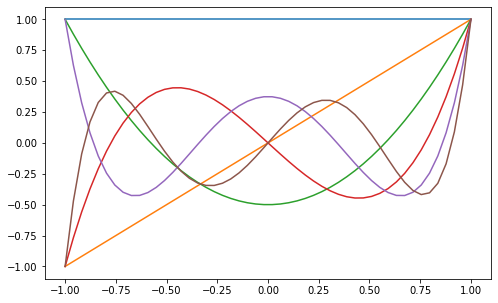

In [16]:
plot_legendre(5)

<i>b. Sprawdź, że ich miejsca zerowe (wykorzystując pole numpy.poly1d.r) są odciętymi punktów Gaussa (scipy.special.roots legendre). Test wykonaj dla wielomianów od 2 do 4 stopnia.</i>

In [17]:
for i, poly in enumerate(legendre_poly(2, 4)):
    print(f'-- x^{i+2} --')
    print(f'Legendre zeros: {sorted(poly.r)}')
    print(f'Gauss points x: {sorted(roots_legendre(i+2)[0])}\n')

-- x^2 --
Legendre zeros: [-0.5773502691896258, 0.5773502691896256]
Gauss points x: [-0.5773502691896257, 0.5773502691896257]

-- x^3 --
Legendre zeros: [-0.7745966692414834, 0.0, 0.7745966692414833]
Gauss points x: [-0.7745966692414834, 0.0, 0.7745966692414834]

-- x^4 --
Legendre zeros: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
Gauss points x: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]



Rzeczywiście, miejsca zerowe wielomianów Legendre'a są odciętymi punktów Gaussa.

<i>c. Podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu).</i>

Podstawowe twierdzenie kwadratur Gaussa mówi, że odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a, b] są zerami wielomianu ortogonalnego $\varphi_n(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

Wielomiany Legendre'a są ortogonalne, więc znajdując ich pierwiastki, możemy użyć ich jako węzłów interpolacji i przybliżyć na ich podstawie całkę.

## 4. Kwadratury Gaussa

<i>Na podstawie parametrów kwadratury Gaussa (scipy.special.roots legendre) zaimplementuj funkcję, która dla określonej liczby punktów k oraz funkcji f policzy wartość $\int_{-1}^{1}f(x)dx $</i>

In [18]:
def gaussian_quadrature(f, k):
    x_s, A_s = roots_legendre(k)
    integral = 0
    for A, x in zip(A_s, x_s):
        integral += A*f(x)
    return integral

<i>Przetestuj jej działanie na jednomianach kolejnych stopni. Sprawdź kiedy przestaje być dokładna i podaj związek z twierdzeniem o stopniu dokładności kwadratury Gaussa.</i>

In [19]:
def test_gauss(k):
    def monomial(i):
        return lambda x: x**i
    
    for i in range(2*k + 2):
        gauss = gaussian_quadrature(monomial(i), k)
        actual = 1/(i+1)*monomial(i+1)(1) - 1/(i+1)*monomial(i+1)(-1)
        print(f"x^{i}: expected: {actual:.3f}, got: {gauss:.3f}, err: {abs(gauss-actual):.5f}, exact?: {np.isclose(abs(gauss-actual),0)}")

In [20]:
test_gauss(5)

x^0: expected: 2.000, got: 2.000, err: 0.00000, exact?: True
x^1: expected: 0.000, got: -0.000, err: 0.00000, exact?: True
x^2: expected: 0.667, got: 0.667, err: 0.00000, exact?: True
x^3: expected: 0.000, got: 0.000, err: 0.00000, exact?: True
x^4: expected: 0.400, got: 0.400, err: 0.00000, exact?: True
x^5: expected: 0.000, got: 0.000, err: 0.00000, exact?: True
x^6: expected: 0.286, got: 0.286, err: 0.00000, exact?: True
x^7: expected: 0.000, got: -0.000, err: 0.00000, exact?: True
x^8: expected: 0.222, got: 0.222, err: 0.00000, exact?: True
x^9: expected: 0.000, got: 0.000, err: 0.00000, exact?: True
x^10: expected: 0.182, got: 0.179, err: 0.00293, exact?: False
x^11: expected: 0.000, got: 0.000, err: 0.00000, exact?: True


In [21]:
test_gauss(2)

x^0: expected: 2.000, got: 2.000, err: 0.00000, exact?: True
x^1: expected: 0.000, got: 0.000, err: 0.00000, exact?: True
x^2: expected: 0.667, got: 0.667, err: 0.00000, exact?: True
x^3: expected: 0.000, got: 0.000, err: 0.00000, exact?: True
x^4: expected: 0.400, got: 0.222, err: 0.17778, exact?: False
x^5: expected: 0.000, got: 0.000, err: 0.00000, exact?: True


Dla k=5 punktów, wartość całki była dokładna aż do stopnia wielomianu n=9. Dla n=10 nie jest dokładna. Natomiast dla k=2 punktów do stopnia 3. Dla n=4 nie jest dokładna. Zgadza się to z twierdzeniem o stopniu dokładności kwadratury Gaussa, które mówi, że n-punktowa kwadratura ma stopień 2n-1.

## 5. Kwadratury Gaussa c.d.

<i>Korzystając z rozwiązań z poprzedniego zadania napisz
funkcję liczącą całkę w dowolnym przedziale $\int_{a}^{b}f(x)dx$ dokonując normalizacji.</i>

In [22]:
def gaussian_quadrature_interval(f, k, a, b):
    return gaussian_quadrature(
        lambda z: f((b+a)/2 + (b-a)/2*z), k)*(b-a)/2

<i>Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.</i>

In [23]:
def test_gaussian_interval(k, a, b):
    def monomial(i):
        return lambda x: x**i
    
    for i in range(2*k+2):
        gauss = gaussian_quadrature_interval(monomial(i), k, a, b)
        actual = 1/(i+1)*monomial(i+1)(b) - 1/(i+1)*monomial(i+1)(a)
        print(f"x^{i}: expected: {actual:.3f}, got: {gauss:.3f}, err: {abs(gauss-actual):.5f}, exact?: {np.isclose(abs(gauss-actual),0)}")

In [24]:
test_gaussian_interval(k=4, a=-3, b=7)

x^0: expected: 10.000, got: 10.000, err: 0.00000, exact?: True
x^1: expected: 20.000, got: 20.000, err: 0.00000, exact?: True
x^2: expected: 123.333, got: 123.333, err: 0.00000, exact?: True
x^3: expected: 580.000, got: 580.000, err: 0.00000, exact?: True
x^4: expected: 3410.000, got: 3410.000, err: 0.00000, exact?: True
x^5: expected: 19486.667, got: 19486.667, err: 0.00000, exact?: True
x^6: expected: 117961.429, got: 117961.429, err: 0.00000, exact?: True
x^7: expected: 719780.000, got: 719780.000, err: 0.00000, exact?: True
x^8: expected: 4485921.111, got: 4463245.374, err: 22675.73696, exact?: False
x^9: expected: 28241620.000, got: 27833456.735, err: 408163.26531, exact?: False


In [25]:
test_gaussian_interval(k=2, a=0.1, b=1.31)

x^0: expected: 1.210, got: 1.210, err: 0.00000, exact?: True
x^1: expected: 0.853, got: 0.853, err: 0.00000, exact?: True
x^2: expected: 0.749, got: 0.749, err: 0.00000, exact?: True
x^3: expected: 0.736, got: 0.736, err: 0.00000, exact?: True
x^4: expected: 0.772, got: 0.757, err: 0.01441, exact?: False
x^5: expected: 0.842, got: 0.792, err: 0.05079, exact?: False


Funkcja działa zgodnie z oczekiwaniami dla wszystkich testowanych przypadków.

## Wnioski
- Podstawowa wersja kwadratury Simpsona nie radzi sobie dobrze ze skomplikowanymi funkcjami, jednak stosując procedurę adaptacyjną jesteśmy w stanie otrzymać wynik o niemalże dowolnej precyzji.
- Kwadratura Gaussa korzysta z wielomianów ortogonalnych, w celu dokładniejszego przybliżenia całki, przy ustalonej liczbie punktów.

M. Hawryluk 12.04.2021